#<strong> Algoritmo de regresión lineal para predecir el precio de viviendas en el estado de California EE.UU.</strong> 🏡🏡

##Objetivos:

1. Descargar el conjunto de datos y prepararlo para su entrenamiento.
2. Entrenar el modelo de regresión lineal para predecir el precio de las casas de California.

El conjunto de datos contiene información de las casas del estado de california, EEUU. Se encuentra en kaggle: https://www.kaggle.com/datasets/camnugent/california-housing-prices

### <strong> Paso 1. Importamos las librerías:</strong>

1. numpy: para realizar cálculos matemáticos sobre matrices.
2. pandas: para la manipulación y el análisis de datos.
3. seaborn: para crear gráficos estadísticos.
4. train_test_split: para separar los datos en train y test.
5. LinearRegression: para el algoritmo de regresión lineal.
6. mean_squared_error: para medir el error cuadrado promedio de las predicciones.
7. StandardScaler: para estandarizar los datos.
8. from google.colab import drive: para montar Google Drive dentro del cuaderno en Google Colab.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from google.colab import drive

### <strong> Paso 2: Cargamos los datos: </strong>

* El conjunto de datos se encuentra en formato .csv
* Descargamos el conjunto de datos **“housing.csv”** para cargarlo en nuestro google drive personal.
* Nos conectamos a google drive.
* Llamamos a la dirección del conjunto de datos convirtiéndolo en un dataframe con el nombre de “datos”.

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
datos = pd.read_csv("/content/drive/MyDrive/GitHub Projects/house_price/housing.csv")

### <strong> Paso 3. Conociendo los datos: </strong>

* Para comenzar a conocer los datos podemos utilizar dos métodos que nos ayudaran a obtener un vistazo rápido del conjunto de datos, se utilizan los comandos:

* <code>dataframe.shape</code> indica el número de filas y columnas.
* <code>dataframe.info</code> indica el número de filas, columnas, el nombre de las columnas, cuenta el número de nulos, muestra de tipo de dato de cada columna y su cantidad.

In [5]:
datos.shape

(20640, 10)

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Observamos que la característica total_bedrooms presenta 207 registros con el valor null, es por ello que en los siguientes pasos lo eliminaremos quedando todas las columnas con el mismo número de registros.

### <strong> Paso 4. Identificar los tipos de datos: </strong>

* Exploramos los tipos de datos de cada columna. Así mismo, identificaremos si hay alguna columna que según su significado no coincida con su tipo de dato:
* La función dtypes genera una tabla con el tipo de dato de cada columna:


In [7]:
datos.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

* Podemos observar que la columna **ocean_proximity** es de tipo object, para un mejor análisis lo transformaremos de tipo **int64** en el Paso 8.

### <strong> Paso 5. Calcular las estadísticas: </strong>

<code>dataframe.describe</code>: para visualizar las estadísticas del conjunto de datos. Por defecto, la función <code>describe</code> trabaja con columnas numéricas y no con columnas de tipo object, mostrando los siguientes datos:

* El número de elementos de la variable
* La media
* La desviación estándar (std)
* El valor mínimo
* Los cuartiles
* El valor máximo

In [8]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Ahora visualizamos a las variables categóricas: agregándole <code>include=['object']</code> podremos observar solo las columnas que son categóricas (de tipo object):

In [9]:
datos.describe(include=['object'])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


* **unique:** conocer los valores únicos, como podemos ver en la columna **ocean_proximity** hay 5 valores diferentes.
* **top:** para conocer el valor que más se repite, el cual es **<1H OCEAN.**
* **freq:** la frecuencia en que se repide el valor **<1H OCEAN.**

### <strong> Paso 6. Exploración y visualización de los datos: </strong>

* Utilizando tecnicas de visualización se puede comenzar a comprender el contexto alrededor de los datos.
* Graficamos cada característica del conjunto de datos:

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

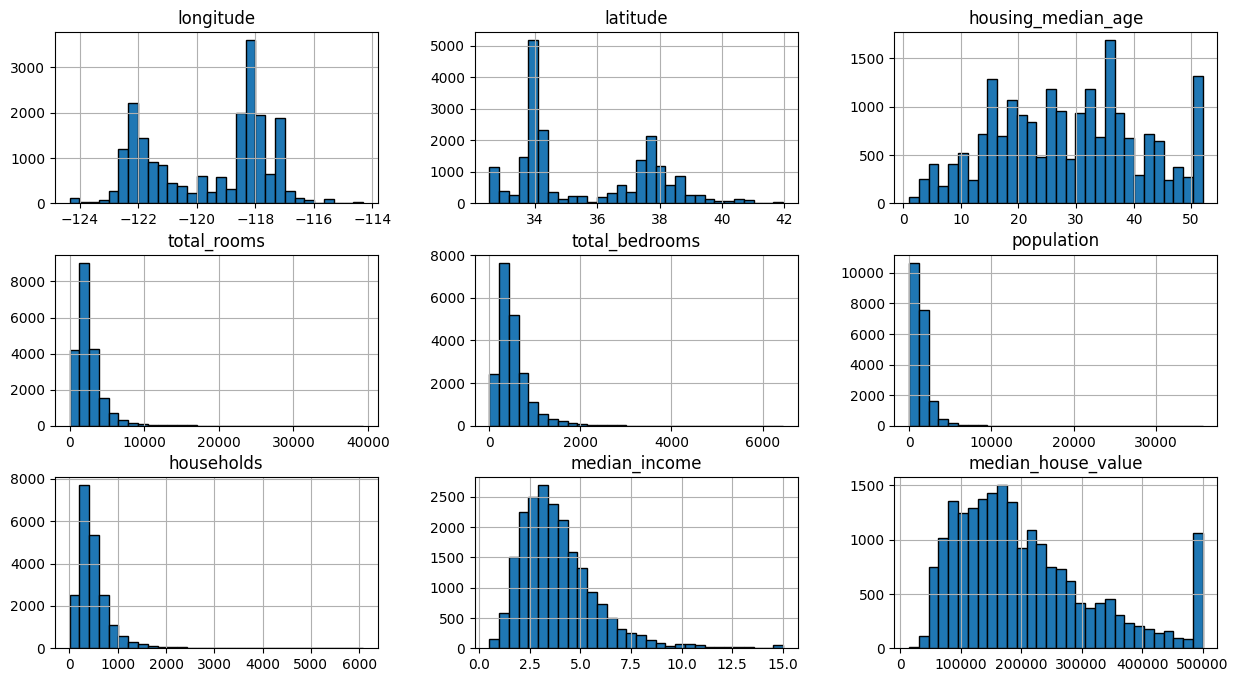

In [10]:
datos.hist(figsize=(15,8), bins=30, edgecolor="black")

Realizamos una nueva gráfica con ayuda de la latitud y longitud determinando que las casas con mayor precio se encuentran cerca al mar. Así mismo, el tamaño de los círculos depende de la población.

<Axes: xlabel='latitude', ylabel='longitude'>

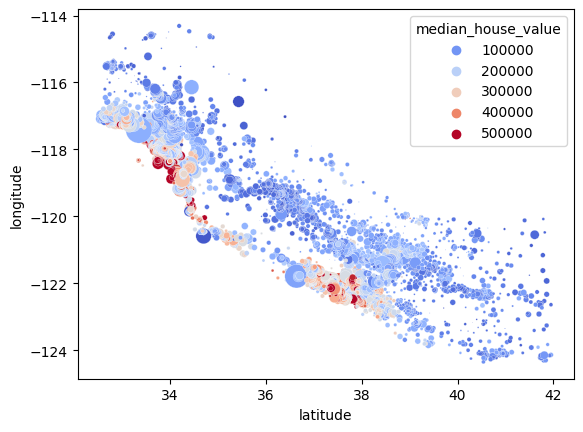

In [11]:
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value",
               palette="coolwarm", s=datos["population"]/100)

### <strong> Paso 7. Limpieza de datos: </strong>
* Resolvemos el problema de datos faltantes, observemos qué variables tienen datos faltantes:

In [12]:
print(datos.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


* Eliminamos los datos faltantes de la columna **total_bedrooms:**

In [13]:
datos_na = datos.dropna()
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### <strong> Paso 8. Convertimos la característica categórica a numérica (ocean_proximity): </strong>

* Usando el método dummies se creará una pequeña tabla:


```
<1H OCEAN   INLAND   ISLAND   NEAR BAY   NEAR OCEAN
    1          0        0         0          0
    0          0        1         0          0
    0          1        0         0          0
    0          0        0         1          0
    0          0        0         0          1

```

* Asignamos la columna específica del que queremos obtener dummies:

In [14]:
dummies = pd.get_dummies(datos_na["ocean_proximity"], dtype=int)

* Unimos los dummies al conjunto datos_na:


In [15]:
datos_na = datos_na.join(dummies)

* Eliminamos la columna **ocean_proximity:**

In [16]:
datos_na = datos_na.drop(["ocean_proximity"], axis=1)

In [17]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


### <strong> Paso 9. Análisis de correlación: </strong>
* La correlación de Pearson es una medida estadística que evalúa la relación lineal entre dos variables continuas.


<Axes: >

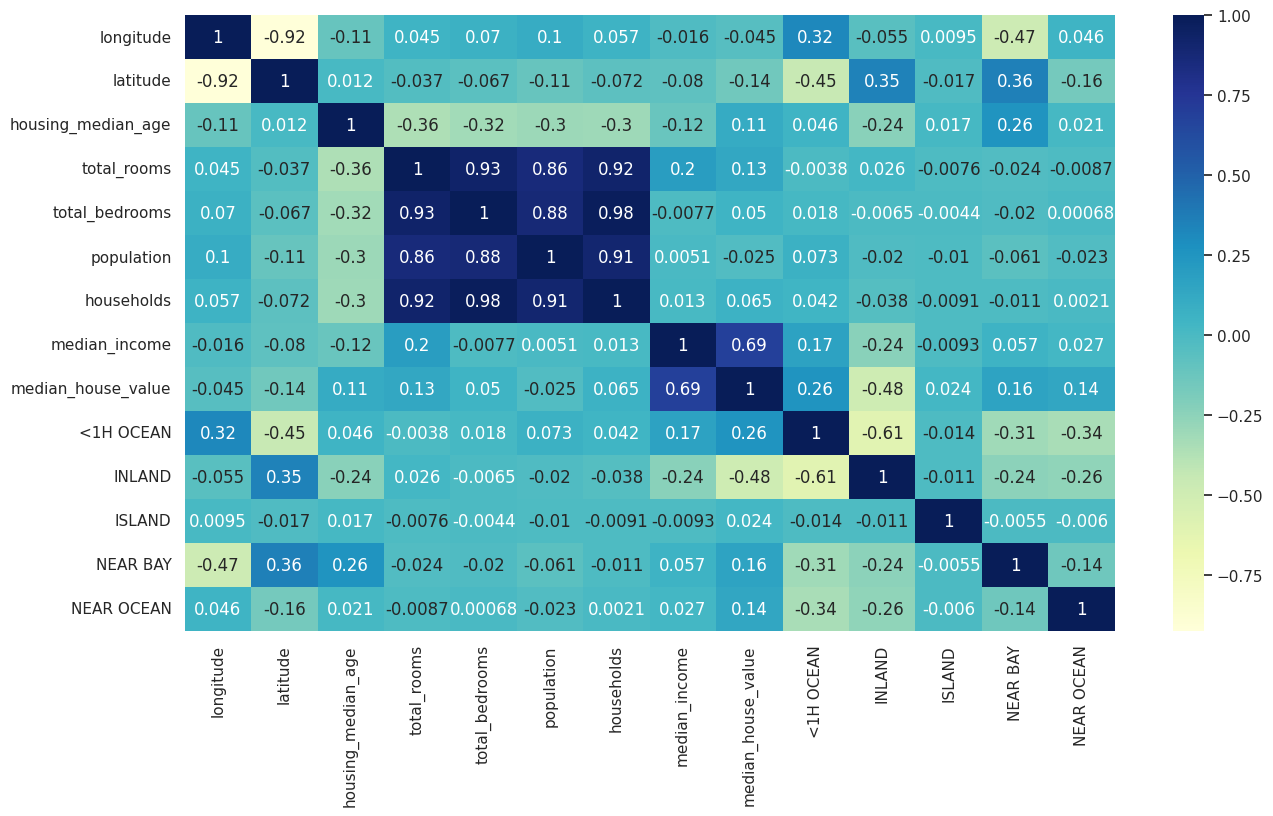

In [18]:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")


En esta gráfica observamos la relación existente entre todos los atributos del conjunto de datos, el cual sus valores van desde -1 hasta 1, donde:

* 1 indica una correlación positiva perfecta, lo que significa que a medida que una variable aumenta, la otra también lo hace en proporción constante.
* -1 indica una correlación negativa perfecta, lo que significa que a medida que una variable aumenta, la otra disminuye en proporción constante.
* 0 indica una ausencia de relación lineal entre las variables
* Analizando la etiqueta median_house_value, observamos que su relación con la etiqueta median_income es de 0.69 indicando que mientras más ingresos tengan los habitantes de un bloque de casas, mayor es su precio de las casas donde viven. De esta manera se pueden analizar todas las demás etiquetas que se relacionan con median_house_value.

### <strong> Paso 10. Análisis de correlación con la característica median_house_value: </strong>

In [19]:
datos_na.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

Con ello determinamos qué características tienen mayor relación con el precio, observamos que las características que influyen en el costo de las casas son: median_income, <1H OCEAN, NEAR BAY, NEAR OCEAN, total_rooms, housing_median_age.

Con esto concluimos el análisis de datos, teniendo preparados los datos y listos para continuar con el segundo objetivo: Entrenar el modelo de regresión lineal, con ello podemos predecir el precio de las casas de California.

### <strong> Paso 11. Entrenar el modelo de regresión lineal: </strong>

* Continuamos con el desarrollo del proyecto utilizando el algoritmo de regresión lineal.
* Usando seaborn realizamos una gráfica con ayuda de los datos de **median_house_value** (eje x) y **median_income** (eje y).

<Axes: xlabel='median_house_value', ylabel='median_income'>

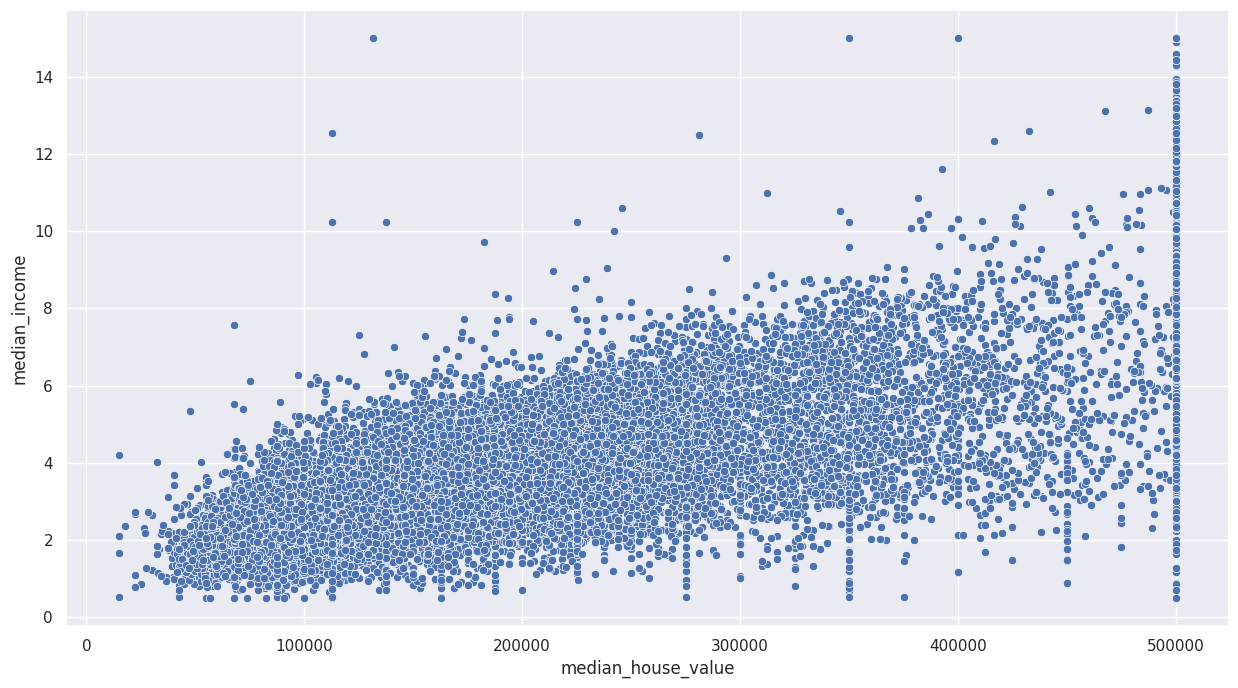

In [23]:
sb.scatterplot(x=datos_na["median_house_value"], y=datos_na["median_income"])


* En esta gráfica observamos que existe una relación, ya que a mayor promedio de ingresos mayor es el costo de las casas.

Si queremos saber la proporción de cuantos cuartos de todos los cuartos son cuartos para dormir creamos una nueva característica: **bedroom_ratio.**

In [24]:
datos_na["bedroom_ratio"] = datos_na["total_bedrooms"] / datos_na["total_rooms"]

<Axes: >

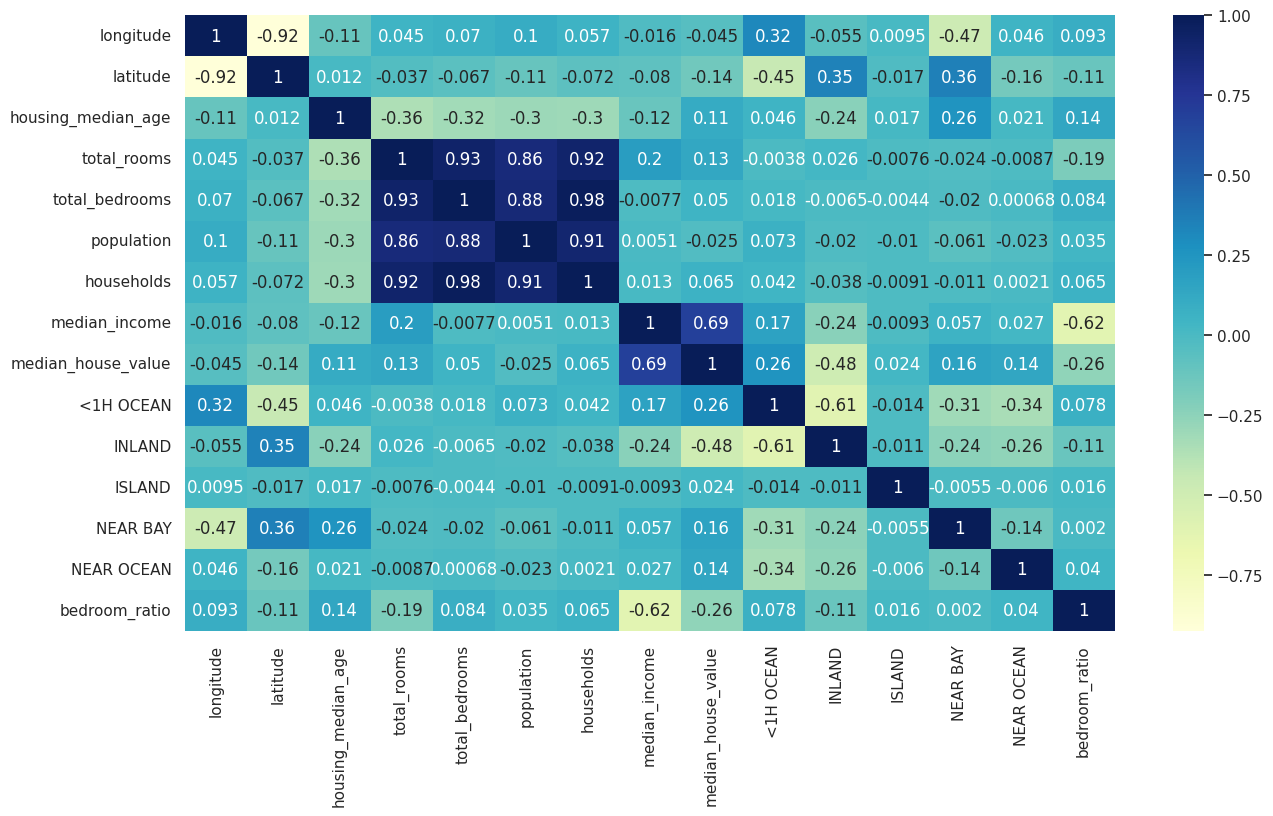

In [25]:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

En la gráfica observamos que la nueva característica **bedroom_ratio** tiene una relación de **-0.26** con **median_house_value**, entonces si hay menos habitaciones para dormir más cuesta la casa.

### <strong> Paso 12. Separar las características de la etiqueta: </strong>

* X = datos para entrenar el modelo y predecir.
* y = datos de respuesta.

In [26]:
X = datos_na.drop(["median_house_value"], axis=1)
y = datos_na["median_house_value"]

### <strong> Paso 13. Separar los datos en 2 partes: </strong>
1. Conjunto de entrenamiento (X_ent, y_ent).
2. Conjunto de pruebas. (X_pru, y_pru)
* train_test_split: devuelve 4 valores.
* test_size = .2: indicamos que el 20% de datos es para pruebas.

In [27]:
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

Si queremos conocer la forma de cada variable (número de registros y número de columnas) podemos ingresar lo siguiente:

* <code>X_ent.shape</code> tiene 16346 registros con 14 columnas.
* <code>y_ent.shape</code> tiene 16346 registros con 1 columna.
* <code>X_pru.shape</code> tiene 4087 registros con 14 columnas.
* <code>y_pru.shape</code> tiene 4087 registros con 1 columna.

### <strong> Paso 14. Creamos el modelo de regresión lineal: </strong>

In [28]:
modelo = LinearRegression()

### <strong> Paso 15. Entrenamos el modelo: </strong>

* Entrenamos el modelo con el conjunto de datos de entrenamiento (X_ent, y_ent):

In [29]:
modelo.fit(X_ent, y_ent)

LinearRegression()

### <strong> Paso 16. Realizamos las predicciones: </strong>
* Realizamos las predicciones con el conjunto de datos de pruebas.
* modelo.predict(X_pru): realiza las predicciones de acuerdo al modelo entrenado.
* Luego de realizar las predicciones lo comparamos con los resultados reales de pruebas (y_pru).

In [30]:
predicciones = modelo.predict(X_pru)

### <strong> Paso 17. Comparamos lo que se predijo con los valores reales: </strong>

In [31]:
comparativa = {"Prediccion": predicciones, "Valor Real": y_pru}
pd.DataFrame(comparativa)

,Prediccion,Valor Real
13474,143409.100736,125800.0
2577,199557.663257,92800.0
12992,182010.387523,137000.0
6683,234265.779379,321100.0
12758,101767.272396,156900.0
...,...,...
7778,193607.710749,165600.0
7308,180836.916236,154700.0
5292,504259.918844,500001.0
3381,313017.402832,277600.0


* Podemos observar que algunas predicciones se acercan a los precios reales de las casas, sin embargo, otras no tanto. Esto puede llevarnos a la idea que el modelo esté pasando por overfitting.

Comprobamos si el modelo está pasando por un overfitting (sobreajuste):

In [32]:
print(modelo.score(X_ent, y_ent))
print(modelo.score(X_pru, y_pru))

0.6497086511658932
0.6606235814737443


### <strong> Paso 18. Calcular el error: </strong>
* Comparamos las etiquetas reales con las predicciones.
* **mean_squared_error:** obtiene la diferencia entre **predicciones y y_pru** (datos reales) y lo eleva al cuadrado (para que los negativos sean positivos y los datos que tienen mayor error aumenten mucho más a diferencia de los que tienen poco error).

In [33]:
mse = mean_squared_error(y_pru, predicciones)

**mse:** es un número muy grande porque está elevado al cuadrado:

In [35]:
mse

4618183270.643486

Por ello sacamos su raíz cuadrada:

In [36]:
rmse = np.sqrt(mse)

Promedio de cuanto estamos fallando al calcular el precio de todas las casas:


In [37]:
rmse

67957.21647215611

### <strong> Paso 19. Transformación de datos: </strong>
* Si mostramos el conjunto de datos no normalizados, observamos que sus valores son muy distantes.

In [38]:
X_ent

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
16743,-122.45,37.71,50.0,1441.0,283.0,1159.0,286.0,4.5417,0,0,0,0,1,0.196391
14124,-117.08,32.75,20.0,1886.0,586.0,1134.0,525.0,1.5029,0,0,0,0,1,0.310710
3619,-118.44,34.25,35.0,1583.0,324.0,1481.0,351.0,3.7000,1,0,0,0,0,0.204675
10346,-117.66,33.61,17.0,3464.0,519.0,1713.0,530.0,6.0471,1,0,0,0,0,0.149827
4718,-118.38,34.06,31.0,4345.0,1158.0,1987.0,1070.0,2.8233,1,0,0,0,0,0.266513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,-118.19,33.79,30.0,3107.0,994.0,3543.0,850.0,1.9387,0,0,0,0,1,0.319923
11308,-117.93,33.77,36.0,3157.0,582.0,1842.0,561.0,4.5833,1,0,0,0,0,0.184352
20240,-119.25,34.27,46.0,679.0,159.0,382.0,143.0,3.5000,0,0,0,0,1,0.234168
14569,-117.21,32.83,28.0,3241.0,533.0,1334.0,513.0,4.1806,0,0,0,0,1,0.164455


* Es por ello que se recomienda normalizar el conjunto de datos para un mejor entrenamiento.

**19.1. Normalización:**

* La normalización o escalamiento es necesario para poner todas las variables numéricas en la misma escala y así el modelo no le de más importancia a los números grandes.
* Las técnicas basadas en distancias siempre necesitan normalización.
* Se recomienda escalar los datos de entrenamiento y de prueba, pero solo a los de características mas no los de salida.

In [39]:
scaler = StandardScaler()

X_ent_esc = scaler.fit_transform(X_ent)
X_pru_esc = scaler.fit_transform(X_pru)

In [40]:
pd.DataFrame(X_ent_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.435482,0.976809,1.699179,-0.548558,-0.609617,-0.236346,-0.562312,0.365479,-0.893221,-0.67755,-0.013549,-0.356697,2.603863,-0.291110
1,1.242248,-1.349219,-0.692134,-0.344908,0.111619,-0.258236,0.063713,-1.254242,-0.893221,-0.67755,-0.013549,-0.356697,2.603863,1.676608
2,0.564089,-0.645783,0.503522,-0.483573,-0.512024,0.045595,-0.392054,-0.083159,1.119543,-0.67755,-0.013549,-0.356697,-0.384045,-0.148534
3,0.953033,-0.945916,-0.931265,0.377250,-0.047863,0.248733,0.076809,1.167877,1.119543,-0.67755,-0.013549,-0.356697,-0.384045,-1.092603
4,0.594008,-0.734885,0.184681,0.780432,1.473160,0.488645,1.491258,-0.550451,1.119543,-0.67755,-0.013549,-0.356697,-0.384045,0.915862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,0.688751,-0.861504,0.104970,0.213872,1.082788,1.851067,0.915001,-1.021955,-0.893221,-0.67755,-0.013549,-0.356697,2.603863,1.835174
16342,0.818399,-0.870883,0.583233,0.236754,0.102097,0.361684,0.158009,0.387652,1.119543,-0.67755,-0.013549,-0.356697,-0.384045,-0.498334
16343,0.160186,-0.636404,1.380337,-0.897281,-0.904777,-0.916681,-0.936878,-0.189761,-0.893221,-0.67755,-0.013549,-0.356697,2.603863,0.359118
16344,1.177424,-1.311703,-0.054450,0.275196,-0.014538,-0.083117,0.032281,0.173007,-0.893221,-0.67755,-0.013549,-0.356697,2.603863,-0.840808


* Observamos que los datos ahora son números pequeños positivos y negativos, ya no son números con grandes distancias entre sí.

### <strong> Conclusión: </strong>

✅ Se desarrolló los pasos de preparación de datos sobre el conjunto de datos de housing, pasando por los diferentes pasos como lo son: recopilación del conjunto de datos, entendimiento y visualización, análisis de calidad, limpieza y transformación del conjunto de datos, entrenamiento del modelo de regresión lineal, predicción y comparación de sus resultados con los datos reales.


✅ De esta manera se espera realizar nuevamente el entrenamiento con el nuevo conjunto de datos normalizados, obteniendo posibles mejores predicciones, cercanos a los precios reales de las casas de California. 🏡


✅ Este proyecto se llevó a cabo gracias a los conocimientos impartidos de Rodrigo Montemayor en su curso de Introducción a la IA con Python.


✅ Muchas gracias por tomarte el tiempo en leer y practicar. Si tienes alguna pregunta, no dudes en hacerlo. ¡Espero que te haya sido útil! 🙌🏼 🚀

